In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api
import ISLP.models

# 线性回归

## 概述

本 Jupyter Notebook 主要集中在使用波士顿房价数据集（Boston housing dataset）来实现和分析一个线性回归（Linear Regression）模型。在本节结束时，您将学会如何：

- **实现线性回归：**
理解在线性回归模型中设计矩阵框架（design matrix framework）的应用。
提取模型参数，并使用拟合的模型进行预测。

- **可视化模型结果：**
绘制原始数据点和线性回归模型预测的值。
通过比较预测值和实际数据，直观评估模型的拟合效果。

## 加载数据

我们将使用“Boston”示例数据集：

In [14]:
data_boston = ISLP.load_data("Boston")

## 第一步，理解数据

在对数据集建模之前，我们需要先理解数据。让我们专注于示例数据集中的 `lstat` 和 `medv` 两列。`lstat` 列表示特定郊区或社区中低社会经济地位（lower socio-economic status）人群的比例。换句话说，它显示了没有完成高中教育的成年人和被归类为体力劳动者的男性工人比例。`medv` 列则表示自有住房的中位数价值，单位为千美元。因此，该列中的每个值表示特定郊区或社区的房屋中位数价值。例如，`medv` 值为 24 表示中位房价为 24,000 美元。

理解了这两列数据后，让我们开始思考它们的关系。我们可以假设，在 `lstat` 较高（即来自低社会经济地位的人群比例较高）的社区中，居民可能无法承担昂贵的房屋（即 `medv` 值较高）。我们将首先绘制数据图，以观察这个反向关系的假设是否值得进一步探讨。我们会将 `lstat` 值绘制在 x 轴，将 `medv` 值绘制在 y 轴，使用 `matplotlib` 库来完成绘图。

我们只需要运行一次 `%matplotlib inline`，即可在 Notebook 中显示图表。现在，我们将开始绘制数据点。

为了方便引用，我们会将这两个感兴趣的列存储在以下变量中：

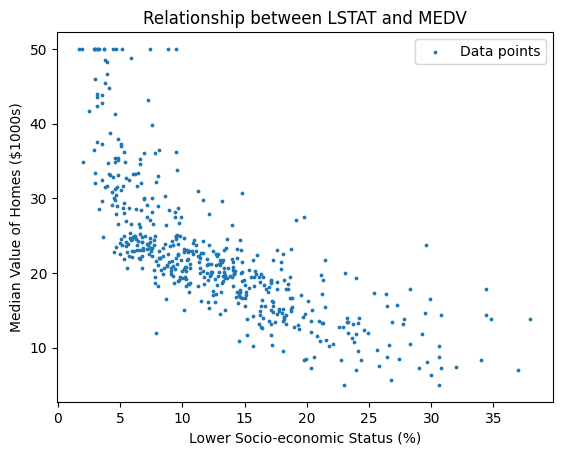

In [15]:
lstat = data_boston["lstat"]
medv = data_boston["medv"]

plt.scatter(
    lstat,
    medv,
    s=3,
    label="Data points",
)
plt.xlabel("Lower Socio-economic Status (%)")
plt.ylabel("Median Value of Homes ($1000s)")
plt.title("Relationship between LSTAT and MEDV")
plt.legend()
plt.show()

从图表中可以观察到，随着 `lstat` 值的增加（即社区中低社会经济地位人群比例上升），`medv` 值通常呈下降趋势（房屋的持有者居住的房屋价格较低）。这一观察足以让我们决定进一步探究两者的关系。从数据点的分布来看，可以推测线性模型（linear model）是一个不错的选择（尽管不一定是最优的模型）来表示这两个变量之间的关系。

## 使用设计矩阵进行线性回归

线性回归（Linear Regression）是一种用于建模因变量（在本例中为 `medv`）与一个或多个自变量（如 `lstat`）之间关系的方法。我们可以使用设计矩阵（Design Matrix）来表示这种关系。

### 设计矩阵

在线性回归中，设计矩阵 \(X\) 包含所有自变量和一个截距项（intercept term）。每一行代表一个观测值，每一列代表一个变量。对于仅有一个自变量 `lstat` 的简单线性回归，其设计矩阵可以构建如下：

$$
X = \begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
\vdots & \vdots \\
1 & x_{n} \\
\end{bmatrix}
$$

其中，\($x_{i}$\) 表示第 \(i\) 个观测值的自变量 `lstat` 的值，第一列由 1 组成，以表示截距项。

### 线性模型

线性回归模型可以用矩阵形式表示为：

$$\mathbf{y} = X \mathbf{\beta} + \mathbf{\epsilon} $$

- \($\mathbf{y}$\) 为因变量 `medv` 的向量。
- \($X$\) 为设计矩阵。
- \($\mathbf{\beta}$\) 为系数向量，包括截距和斜率。
- \($\mathbf{\epsilon}$\) 为误差向量。

### 估计系数

系数 \($\mathbf{\beta}$\) 可以通过普通最小二乘法（Ordinary Least Squares, OLS）进行估计，OLS 方法通过最小化残差的平方和来实现。OLS 估计器的公式为：

$$\mathbf{\hat{\beta}} = (X^T X)^{-1} X^T \mathbf{y} $$

其中：
- \($X^T$\) 是设计矩阵的转置。
- \($ (X^T X)^{-1}$ \) 是 \($X^T$\) 和 \($X$\) 的乘积的逆矩阵。
- \($X^T \mathbf{y}$\) 是 \($X$\) 的转置与向量 \($\mathbf{y}$\) 的乘积。

### 预测

一旦我们估计出了系数 \($\mathbf{\hat{\beta}}$\)，就可以使用该模型对新数据点进行预测：

$$\mathbf{\hat{y}} = X \mathbf{\hat{\beta}} $$

其中，\($\mathbf{\hat{y}}$\) 为 `medv` 的预测值向量。

## 实现

现在，我们将构建设计矩阵 \($X$\)，其中包含一列全为 1 的数据以表示截距项，以及我们关注的协变量（`lstat`）：

In [16]:
mask = data_boston["medv"] < 47

x_matrix = pd.DataFrame(
    {"intercept": np.ones(lstat.shape[0])[mask], "rm": data_boston["rm"][mask]}
)
x_matrix.head()

,intercept,rm
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


接下来，我们将选择 `medv` 作为响应变量，并拟合线性模型：

In [17]:
y = data_boston["medv"][mask]

我们将使用 `statsmodels.api` 中的 `OLS()` 类来准备我们的线性模型对象。此类仅用于构建 \($\mathbf{y} = X \mathbf{\beta} + \mathbf{\epsilon}$\) 模型对象，并不会执行拟合（即不会计算 \($\hat\beta$\)）。

In [18]:
model = statsmodels.api.OLS(y, x_matrix)

`fit()` 方法将计算 \($\hat\beta$\) 系数。

In [19]:
results = model.fit()

`ISLP` 包中的 `models.summarize()` 函数会生成一个表格，展示参数估计值、其标准误差、t 统计量以及 p 值。

In [20]:
ISLP.models.summarize(results)

,coef,std err,t,P>|t|
intercept,-28.0949,2.529,-11.108,0.0
rm,7.9512,0.404,19.698,0.0


当然，我们也可以直接从 `results` 对象中提取这些参数。

In [21]:
results.params

intercept   -28.094916
rm            7.951235
dtype: float64

In [22]:
results.tvalues

intercept   -11.107861
rm           19.698424
dtype: float64

在设计矩阵框架中：

In [23]:
beta_hat = results.params
y_hat = x_matrix @ beta_hat

接下来，我们将把线性回归结果与数据一起绘制出来：

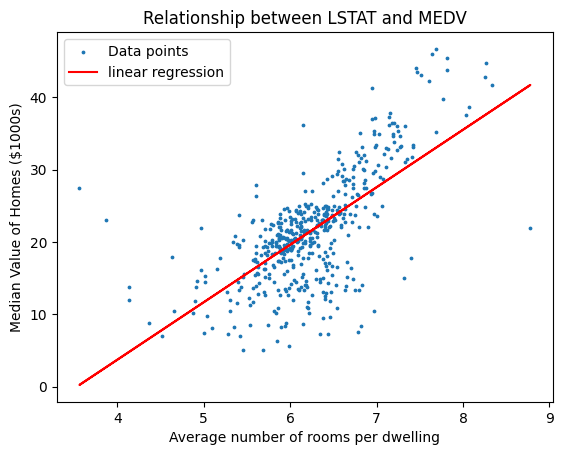

In [24]:
plt.scatter(
    data_boston["rm"][mask],
    data_boston["medv"][mask],
    s=3,
    label="Data points",
)

plt.plot(
    data_boston["rm"][mask],
    y_hat,
    "r",
    label="linear regression",
)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median Value of Homes ($1000s)")
plt.title("Relationship between LSTAT and MEDV")
plt.legend()
plt.show()

线性回归模型似乎能很好地描述变量中等范围内的数据，但在预测 `lstat` 值较小和较大的情况时不够准确。从此步骤开始，我们需要评估模型的精度是否足以满足我们的目的，或者是否需要投入更多时间并使用更复杂的模型来提高准确性。

## 轮到您了！

1. 思考数据集中的不同列。
2. 试着猜测哪些列可能会（或不会）对房价 (`medv`) 产生影响。
3. 生成散点图，看看您的猜测是否正确。
4. 尝试拟合线性模型，并将拟合的直线绘制在数据上方。
5. 试着描述您所观察到的内容。

您是否尝试对不会影响房价的数据应用这个流程？  
在不绘制数据的情况下，如何判断线性回归是否是一个好的选择？